In [42]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import plotly.offline as po
import plotly.graph_objs as go
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Import Customer Churn Dataset
churn_dataset = pd.read_csv('Tel_Customer_Churn_Dataset.csv')
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Number of Columns and Rows in the Dataset
churn_dataset.shape

(7043, 21)

In [ ]:
# Types of columns in the Dataset
churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Convert 'Total Charges' column values to float data type
### Glance at above makes me realize that TotalCharges should be float but it is an object.
churn_dataset.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
### Remove rows with space in TotalCharges
churn_dataset.iloc[488].TotalCharges
churn_dataset= churn_dataset[churn_dataset.TotalCharges!=' ']
churn_dataset.shape


(7032, 21)

In [13]:
churn_dataset.TotalCharges = pd.to_numeric(churn_dataset.TotalCharges)
churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
# Convert 'No internet service' and 'no phone service' to 'No' 
churn_dataset.replace('No internet service','No',inplace=True)
churn_dataset.replace('No phone service','No',inplace=True)


In [26]:
# Convert String values (Yes and No) in  columns to 1 and 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    churn_dataset[col].replace({'Yes': 1,'No': 0},inplace=True)

In [28]:
# Drop Customer ID column
churn_dataset.drop('customerID',axis='columns',inplace=True)

In [30]:
# Convert Male and Female in gender to 0 and 1
churn_dataset['gender'].replace({'Female':1,'Male':0},inplace=True)

In [33]:
# Perform One Hot Encoding using get_dummies method for the categorical columns
churn_dataset = pd.get_dummies(data= churn_dataset, columns=['InternetService','Contract','PaymentMethod'])
churn_dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
# Churn Dataset
churn_dataset.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2560,0,0,0,0,0.633803,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
43,1,0,0,0,0.873239,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
3555,0,0,0,0,0.267606,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5741,0,0,0,0,0.253521,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1968,1,0,0,0,0.732394,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1


In [40]:
# Churn Dataset shape
churn_dataset.shape

(7032, 27)

In [38]:
# Churn Dataset Data Types
churn_dataset.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [43]:
# Visualize Total Customer Churn
plot_by_churn_labels = churn_dataset["Churn"].value_counts().keys().tolist()
plot_by_churn_values = churn_dataset["Churn"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_churn_labels,
           values = plot_by_churn_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Customer Churn",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [44]:
# Visualize Churn Rate by Gender
plot_by_gender = churn_dataset.groupby('gender').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_gender['gender'],
        y=plot_by_gender['Churn'],
        width = [0.3, 0.3],
        marker=dict(
        color=['orange', 'green'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [45]:
# Visualize Churn Rate by Tech Support
plot_by_techsupport = churn_dataset.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_techsupport['TechSupport'],
        y=plot_by_techsupport['Churn'],
        width = [0.3, 0.3, 0.3],
        marker=dict(
        color=['orange', 'green', 'teal'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Tech Support',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [49]:
# Visualize Relation between Tenure & Churn rate
plot_by_tenure = churn_dataset.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot_by_tenure['tenure'],
        y=plot_by_tenure['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'green'
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Relation between Tenure & Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [36]:
#Perform Feature Scaling 
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_dataset[cols_to_scale] = scaler.fit_transform(churn_dataset[cols_to_scale])

In [53]:
#Split the data into training set (80%) and test set (20%)
X = churn_dataset.drop('Churn',axis='columns')
y = churn_dataset['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [55]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [57]:
# Logistic Regression
### Fit the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

### Predict the value for new, unseen data
pred = logmodel.predict(X_test)

### Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

print(logmodel_accuracy)

79.46


In [58]:
# Support Vector Classifier 
### Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)

### Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

### Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

print(svc_accuracy)

78.61


In [59]:
# K-Nearest
### Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
### Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

### Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

print(knn_accuracy)


74.98


In [60]:
# Decision Tree
### Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
### Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

### Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

print(dt_accuracy)

70.79


In [61]:
# Random Forest
### Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
### Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

### Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

print(rf_accuracy)

77.54


In [86]:
# Build a model (ANN) in tensorflow/keras
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)



Epoch 1/200
176/176 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.7536
Epoch 2/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7963
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8014
Epoch 4/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.7988
Epoch 5/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8044
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8082
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8087
Epoch 8/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8089
Epoch 9/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8094
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4021 - accura

In [96]:
test_loss, test_acc= model.evaluate(X_test, y_test)
ANN_accuracy = test_acc*100

44/44 [==============================] - 0s 9ms/step - loss: 0.5175 - accuracy: 0.7711


In [97]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest', "Artificial Neural Network"],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy, ANN_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,79.460000,Logistic Regression
1,78.610000,Support Vector Machine
2,77.540000,Random Forest
3,77.114427,Artificial Neural Network
4,74.980000,K-Nearest Neighbor
5,70.790000,Decision Tree


In [98]:
#Generate confusion matrix for logistics regression model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[890, 109],
       [180, 228]])

Text(69.0, 0.5, 'Truth')

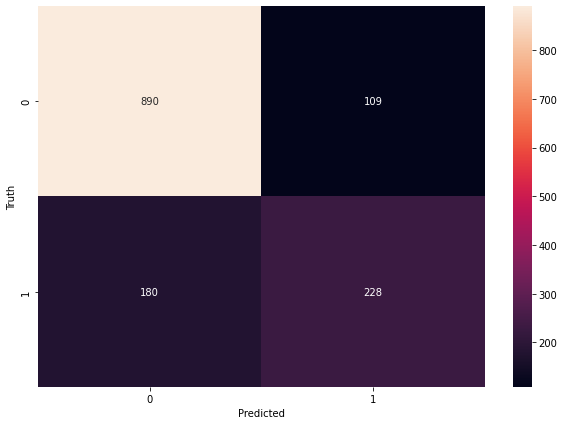

In [99]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
# Predict the probability of Churn of each customer
churn_dataset['Probability_of_Churn'] = logmodel.predict_proba(churn_dataset[X_test.columns])[:,1]

In [106]:
# Create a Dataframe showcasing probability of Churn of each customer
churn_dataset[['Probability_of_Churn']].head()
churn_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Probability_of_Churn
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0.571618
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0.044452
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0.257408
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0.031569
4,1,0,0,0,0.014085,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0.698077
